In [1]:
import json
import re

In [2]:
with open('nvdcve-1.0-2017.json') as data_source:
    data = json.load(data_source)

cve_items = data["CVE_Items"]

In [3]:
len(cve_items)

8381

In [4]:
Type = 2
Product = 4
TargetSw = 10

In [7]:
mobile_indicators = [
    {Type: 'o', Product: 'android'},
    {Type: 'o', Product: 'iphone_os'},
    {Type: 'o', Product: 'linux_kernel'},
    {Type: 'o', Product: 'windows_rt_8.1'},
    {Type: 'o', Product: 'samsung_mobile'},
    {Type: 'a', TargetSw: 'android'},
    {Type: 'a', TargetSw: 'iphone_os'},
    {Type: 'a', TargetSw: 'linux_kernel'},
    {Type: 'a', TargetSw: 'windows_rt_8.1'},
    {Type: 'a', TargetSw: 'samsung_mobile'}
]

pc_indicators = [
    {Type: 'o', Product: 'mac_os_x'},
    {Type: 'o', Product: 'linux_kernel'},
    {Type: 'o', Product: 'enterprise_linux_desktop'},
    {Type: 'o', Product: 'enterprise_linux_workstation'},
    {Type: 'o', Product: 'backbox_linux'},
    {Type: 'o', Product: 'debian_linux'},
    {Type: 'o', Product: 'fedora'},
    {Type: 'o', Product: 'ubuntu_linux'},
    {Type: 'o', Product: 'windows_10'},
    {Type: 'o', Product: 'windows_8'},
    {Type: 'o', Product: 'windows_8'},
    {Type: 'o', Product: 'windows_7'},
    {Type: 'o', Product: 'windows_vista'},
    {Type: 'o', Product: 'windows_xp'},
    {Type: 'a', Product: 'active_management_technology_firmware'},
    {Type: 'a', TargetSw: 'mac_os_x'},
    {Type: 'a', TargetSw: 'linux_kernel'},
    {Type: 'a', TargetSw: 'enterprise_linux_desktop'},
    {Type: 'a', TargetSw: 'enterprise_linux_workstation'},
    {Type: 'a', TargetSw: 'backbox_linux'},
    {Type: 'a', TargetSw: 'debian_linux'},
    {Type: 'a', TargetSw: 'fedora'},
    {Type: 'a', TargetSw: 'ubuntu_linux'},
    {Type: 'a', TargetSw: 'windows_10'},
    {Type: 'a', TargetSw: 'windows_8'},
    {Type: 'a', TargetSw: 'windows_8'},
    {Type: 'a', TargetSw: 'windows_7'},
    {Type: 'a', TargetSw: 'windows_vista'},
    {Type: 'a', TargetSw: 'windows_xp'},
    {Type: 'a', TargetSw: 'active_management_technology_firmware'}
]

net_indicators = [
    {Type: 'o', Product: 'fiberair_ip-10_firmware'},
    {Type: 'o', Product: 'ios'},
    {Type: 'o', Product: 'ios_xe'},
    {Type: 'o', Product: 'ios_xr'},
    {Type: 'o', Product: 'iox'},
    {Type: 'o', Product: 'staros'},
    {Type: 'o', Product: 'junos'},
    {Type: 'o', Product: 'screenos'},
    {Type: 'o', Product: 'routeros'},
    {Type: 'o', Product: 'backhaul_radios'},
    {Type: 'o', Product: 'client_radios'},
    {Type: 'o', Product: 'onos'},
    {Type: 'o', Product: 'pan-os'},
    {Type: 'o', Product: 'fireware'},
    {Type: 'o', Product: 'wre6505_firmware'},
    {Type: 'a', TargetSw: 'fiberair_ip-10_firmware'},
    {Type: 'a', TargetSw: 'ios'},
    {Type: 'a', TargetSw: 'ios_xe'},
    {Type: 'a', TargetSw: 'ios_xr'},
    {Type: 'a', TargetSw: 'iox'},
    {Type: 'a', TargetSw: 'staros'},
    {Type: 'a', TargetSw: 'junos'},
    {Type: 'a', TargetSw: 'screenos'},
    {Type: 'a', TargetSw: 'routeros'},
    {Type: 'a', TargetSw: 'backhaul_radios'},
    {Type: 'a', TargetSw: 'client_radios'},
    {Type: 'a', TargetSw: 'onos'},
    {Type: 'a', TargetSw: 'pan-os'},
    {Type: 'a', TargetSw: 'fireware'},
    {Type: 'a', TargetSw: 'wre6505_firmware'}
]

server_indicators = [
    {Type: 'o', Product: 'mac_os_server'},
    {Type: 'o', Product: 'ubuntu_linux'},
    {Type: 'o', Product: 'asyncos'},
    {Type: 'o', Product: 'email_security_appliance_firmware'},
    {Type: 'o', Product: 'unified_intelligence_center'},
    {Type: 'o', Product: 'web_security_appliance'},
    {Type: 'o', Product: 'application_delivery_controller_firmware'},
    {Type: 'o', Product: 'netscaler_gateway_firmware'},
    {Type: 'o', Product: 'xenmobile_server'},
    {Type: 'o', Product: 'debian_linux'},
    {Type: 'o', Product: 'isilon_onefs'},
    {Type: 'o', Product: 'fedora'},
    {Type: 'o', Product: 'fortianalyzer_firmware'},
    {Type: 'o', Product: 'fortios'},
    {Type: 'o', Product: 'fortiwlc'},
    {Type: 'o', Product: 'freebsd'},
    {Type: 'o', Product: 'i'},
    {Type: 'o', Product: 'junos_space'},
    {Type: 'o', Product: 'linux_kernel'},
    {Type: 'o', Product: 'windows_server_2003'},
    {Type: 'o', Product: 'windows_server_2008'},
    {Type: 'o', Product: 'windows_server_2012'},
    {Type: 'o', Product: 'windows_server_2016'},
    {Type: 'o', Product: 'asp.net'},
    {Type: 'o', Product: 'data_ontap'},
    {Type: 'o', Product: 'netbsd'},
    {Type: 'o', Product: 'nixos'},
    {Type: 'o', Product: 'leap'},
    {Type: 'o', Product: 'openbsd'},
    {Type: 'o', Product: 'leap'},
    {Type: 'o', Product: 'solaris'},
    {Type: 'o', Product: 'qts'},
    {Type: 'o', Product: 'enterprise_linux'},
    {Type: 'o', Product: 'enterprise_linux_server'},
    {Type: 'o', Product: 'xen'},
    {Type: 'a', TargetSw: 'mac_os_server'},
    {Type: 'a', TargetSw: 'ubuntu_linux'},
    {Type: 'a', TargetSw: 'asyncos'},
    {Type: 'a', TargetSw: 'email_security_appliance_firmware'},
    {Type: 'a', TargetSw: 'unified_intelligence_center'},
    {Type: 'a', TargetSw: 'web_security_appliance'},
    {Type: 'a', TargetSw: 'application_delivery_controller_firmware'},
    {Type: 'a', TargetSw: 'netscaler_gateway_firmware'},
    {Type: 'a', TargetSw: 'xenmobile_server'},
    {Type: 'a', TargetSw: 'debian_linux'},
    {Type: 'a', TargetSw: 'isilon_onefs'},
    {Type: 'a', TargetSw: 'fedora'},
    {Type: 'a', TargetSw: 'fortianalyzer_firmware'},
    {Type: 'a', TargetSw: 'fortios'},
    {Type: 'a', TargetSw: 'fortiwlc'},
    {Type: 'a', TargetSw: 'freebsd'},
    {Type: 'a', TargetSw: 'i'},
    {Type: 'a', TargetSw: 'junos_space'},
    {Type: 'a', TargetSw: 'linux_kernel'},
    {Type: 'a', TargetSw: 'windows_server_2003'},
    {Type: 'a', TargetSw: 'windows_server_2008'},
    {Type: 'a', TargetSw: 'windows_server_2012'},
    {Type: 'a', TargetSw: 'windows_server_2016'},
    {Type: 'a', TargetSw: 'asp.net'},
    {Type: 'a', TargetSw: 'data_ontap'},
    {Type: 'a', TargetSw: 'netbsd'},
    {Type: 'a', TargetSw: 'nixos'},
    {Type: 'a', TargetSw: 'leap'},
    {Type: 'a', TargetSw: 'openbsd'},
    {Type: 'a', TargetSw: 'leap'},
    {Type: 'a', TargetSw: 'solaris'},
    {Type: 'a', TargetSw: 'qts'},
    {Type: 'a', TargetSw: 'enterprise_linux'},
    {Type: 'a', TargetSw: 'enterprise_linux_server'},
    {Type: 'a', TargetSw: 'xen'}
]

iot_indicators = [
    {Type: 'o', Product: 'apple_tv'},
    {Type: 'o', Product: 'watchos'},
    {Type: 'o', Product: 'contiki'},
    {Type: 'o', Product: 'openelec'},
    {Type: 'o', Product: 'ruggedcom_rox_i'},
    {Type: 'o', Product: 'tos'},
    {Type: 'o', Product: 'ecos'},
    {Type: 'o', Product: 'mongoose_os'},
    {Type: 'a', TargetSw: 'apple_tv'},
    {Type: 'a', TargetSw: 'watchos'},
    {Type: 'a', TargetSw: 'contiki'},
    {Type: 'a', TargetSw: 'openelec'},
    {Type: 'a', TargetSw: 'ruggedcom_rox_i'},
    {Type: 'a', TargetSw: 'tos'},
    {Type: 'a', TargetSw: 'mongoose_os'},
    {Type: 'a', TargetSw: 'ecos'}
]

reports_os = [
    {Type: 'o', Product: '[^*].*'},
    {Type: 'a', TargetSw: '[^*].*'}
]

In [8]:
def ind_compile(ind):
    for x in ind:
        for k,v in x.items():
            x[k] = re.compile(v)
    return ind

def ind_match(ind, node):
    ind = ind_compile(ind)
    if node['operator'] == 'AND':
        for c in node['children']:
            if ind_match(ind, c):
                return True
    elif node['operator'] == 'OR':
        return cpes_match(ind, node['cpe'])

def cpes_match(ind, cpes):
    for c in cpes:
        if cpe_match(ind, c):
            return True
    return False

def cpe_match(ind, cpe):
    for x in ind:
        match = True
        cs = cpe['cpe23Uri'].split(':')
        for k,v in x.items():
            match = match & (v.match(cs[k]) is not None)
        if match:
            return True
    return False

In [9]:
mobile = []
pc = []
net = []
server = []
iot = []
no_metric = []
non_net = []
pool = []
os_spec = []

for item in cve_items:
    # skip entries that do not have a v3 base metric and are not network attacks
    cid = item['cve']['CVE_data_meta']['ID']
    if "baseMetricV3" not in item["impact"]:
        no_metric.append(cid)
        continue
    vector = item["impact"]["baseMetricV3"]["cvssV3"]["attackVector"]
    if vector != "NETWORK" and vector != "ADJACENT":
        non_net.append(cid)
        continue
        
    pool.append(cid)
        
    for n in item['configurations']['nodes']:
        if ind_match(reports_os, n):
            os_spec.append(cid)
            break
    
    for n in item['configurations']['nodes']:
        if ind_match(mobile_indicators, n):
            mobile.append(cid)
            break
    for n in item['configurations']['nodes']:
        if ind_match(pc_indicators, n):
            pc.append(cid)
            break
    for n in item['configurations']['nodes']:
        if ind_match(net_indicators, n):
            net.append(cid)
            break
    for n in item['configurations']['nodes']:
        if ind_match(server_indicators, n):
            server.append(cid)
            break
    for n in item['configurations']['nodes']:
        if ind_match(iot_indicators, n):
            iot.append(cid)
            break
    for n in item['configurations']['nodes']:
        if ind_match(reports_os, n):
            os_spec.append(cid)
            break
            

len(mobile), len(pc), len(net), len(server), len(iot), len(no_metric), len(non_net), len(pool), len(os_spec)

(445, 460, 101, 668, 44, 664, 2564, 5153, 2856)

In [10]:
accounted = mobile + pc + net + iot + server

In [11]:
#TODO these are the things left to categorize
uncat = sorted(list(set(os_spec).difference(set(accounted))))
uncat

['CVE-2017-1000020',
 'CVE-2017-1000033',
 'CVE-2017-1000038',
 'CVE-2017-1000091',
 'CVE-2017-1000092',
 'CVE-2017-1000093',
 'CVE-2017-1000094',
 'CVE-2017-1000095',
 'CVE-2017-1000104',
 'CVE-2017-1000105',
 'CVE-2017-1000109',
 'CVE-2017-1000110',
 'CVE-2017-1000114',
 'CVE-2017-1002000',
 'CVE-2017-1002001',
 'CVE-2017-1002002',
 'CVE-2017-1002003',
 'CVE-2017-1002004',
 'CVE-2017-1002005',
 'CVE-2017-1002006',
 'CVE-2017-1002007',
 'CVE-2017-1002008',
 'CVE-2017-1002009',
 'CVE-2017-1002010',
 'CVE-2017-1002011',
 'CVE-2017-1002012',
 'CVE-2017-1002013',
 'CVE-2017-1002014',
 'CVE-2017-1002015',
 'CVE-2017-1002016',
 'CVE-2017-1002017',
 'CVE-2017-1002018',
 'CVE-2017-1002019',
 'CVE-2017-1002020',
 'CVE-2017-1002021',
 'CVE-2017-1002022',
 'CVE-2017-1002023',
 'CVE-2017-1002025',
 'CVE-2017-1002026',
 'CVE-2017-1002027',
 'CVE-2017-1002028',
 'CVE-2017-10179',
 'CVE-2017-10676',
 'CVE-2017-10677',
 'CVE-2017-10793',
 'CVE-2017-10816',
 'CVE-2017-10817',
 'CVE-2017-10818',
 'CVE-

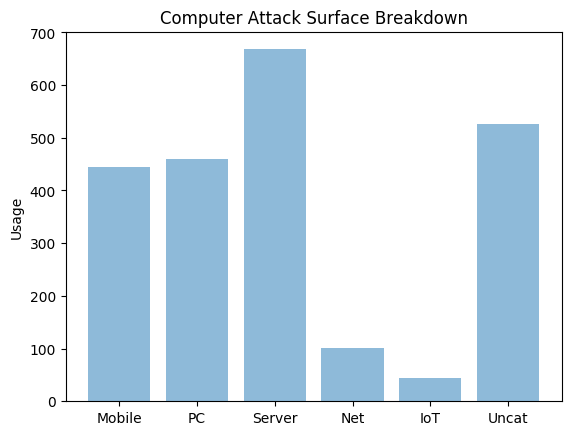

In [14]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Mobile', 'PC', 'Server', 'Net', 'IoT', 'Uncat')
y_pos = np.arange(len(objects))
numbers = [len(mobile), len(pc), len(server), len(net), len(iot), len(uncat)]
 
plt.bar(y_pos, numbers, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Computer Attack Surface Breakdown')
 
plt.show()